In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# 기본 데이터 확인

In [6]:
df_2020 = pd.read_csv("./data/tmdb_2020.csv")
df_2020.head()

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,Stepmom's Desire,2020-05-29,movie,78.0,NaN,NaN,"Drama, Romance",Lee Dong-Joon,"Lee Soo, Tae Hee, James, Jung In",KR,ko,NaN,"Sang-jin, who was envious of her neighbor afte...",softcore,7.150,20
1,Pizza Dare 1,2020-04-10,movie,68.0,NaN,NaN,Romance,Kong Ja-kwan,"Yoo Jung, Yoon So-jung, Jin Si-ah, Baek Yoon-j...",KR,ko,NaN,"Seok, who wants to try perverted sex, pesters ...",softcore,6.222,9
2,Bosomy Mom,2020-05-06,movie,69.0,NaN,NaN,"Drama, Romance",Lee Dong-Joon,"Yoo Jung, Han Yi-seul, James, Shin Yeon-woo",KR,ko,NaN,Da-hee gets married to Min-soo who is older th...,softcore,5.900,11
3,Sonic the Hedgehog,2020-02-12,movie,99.0,NaN,NaN,"Action, Science Fiction, Comedy, Family",Jeff Fowler,"Ben Schwartz, James Marsden, Tika Sumpter, Jim...",US,en,"Original Film, Blur Studio, Marza Animation Pl...","Powered with incredible speed, Sonic The Hedge...","friendship, video game, san francisco, califor...",7.307,9955
4,12,2020-09-04,movie,15.0,NaN,NaN,NaN,Salih Hashwan,NaN,SA,ar,NaN,not there yet,NaN,5.481,53


In [7]:
df_2020.sort_values(by='title', ascending=True).head(10)

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
19,#Alive,2020-06-24,movie,98.0,NaN,NaN,"Action, Horror",Cho Il,"Yoo Ah-in, Park Shin-hye, Lee Hyun-wook, Jin S...",KR,ko,"Lotte Entertainment, Zip Cinema, Perspective P...","As a grisly virus rampages a city, a lone man ...","escape, alone, survival, drone, zombie, apartm...",7.225,1892
11576,#CoupleChallenge – Das beste Team gewinnt,2020-12-08,tv,60.0,4.0,36.0,Reality,NaN,NaN,NaN,de,NaN,NaN,NaN,7.500,2
11352,#FreeRayshawn,2020-04-13,tv,10.0,1.0,15.0,"Drama, Crime",NaN,"Stephan James, Laurence Fishburne, Jasmine Cep...",US,en,"Sony Pictures Television, Fuqua Films",Iraq war veteran Rayshawn takes shelter in his...,NaN,7.200,13
1756,#FriendButMarried 2,2020-02-27,movie,104.0,NaN,NaN,"Drama, Comedy, Romance",Rako Prijanto,"Adipati Dolken, Mawar Eva De Jongh, Vonny Corn...",ID,id,Falcon Pictures,As Ayu and Ditto finally transition from best ...,NaN,6.200,9
13743,#HASHTALK,2020-01-06,tv,3.0,4.0,27.0,NaN,NaN,"Cho Mi-yeon, Minnie, Jeon So-yeon, Song Yuqi, ...",KR,ko,NaN,A mini series focused on the behind the scenes...,NaN,0.000,0
1015,#HandballStrive,2020-07-24,movie,108.0,NaN,NaN,"Comedy, Drama",Daigo Matsui,"Seishirou Katou, Kotaro Daigo, Aju Makita, Har...",JP,ja,"Grasshoppa!, ColorBird",The school’s handball club is about to close d...,"sports, handball, social media, viral video, t...",7.000,2
1040,#Iamhere,2020-02-05,movie,100.0,NaN,NaN,"Comedy, Romance",Eric Lartigau,"Alain Chabat, Bae Doona, Jules Sagot, Ilian Be...",FR,fr,"Rectangle Productions, Gaumont, France 2 Ciném...",Stéphane lives a quiet life as an eminent Fren...,"korean, seoul, south korea",5.562,210
13920,#Influencers: The Series,2020-11-18,tv,NaN,1.0,9.0,Drama,NaN,"Chollo Sotiangco, Leon Eustaquio, Denjo Jose, ...",NaN,en,NaN,"Rooted from the harsh society, and the indiffe...",NaN,1.000,1
18122,#JURIFUL_DAYS,2020-08-15,tv,NaN,2.0,16.0,NaN,NaN,NaN,NaN,en,NaN,Vlog series following Juri of kpop group Rocke...,NaN,1.000,1
10819,#Luimelia,2020-02-14,tv,30.0,4.0,29.0,"Comedy, Drama",NaN,"Carol Rovira, Paula Usero, Lucía Martín Abello...",ES,es,Atresmedia,A spin-off of Love in Difficult Times that foc...,NaN,5.700,16


In [8]:
df_2020.isnull().sum()

title                     0
release_date              0
type                      0
runtime                5900
season_count          10000
episode_count         10002
genre                  3871
director               7949
cast                   4456
country                1665
language                  0
production_company     9140
synopsis               4656
tags                  15174
imdb_rating               0
imdb_review_count         0
dtype: int64

# 2. 전처리 전처리_type

In [9]:
df_2020[df_2020['season_count'].isna() & df_2020['episode_count'].isna()].head(5)

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,Stepmom's Desire,2020-05-29,movie,78.0,NaN,NaN,"Drama, Romance",Lee Dong-Joon,"Lee Soo, Tae Hee, James, Jung In",KR,ko,NaN,"Sang-jin, who was envious of her neighbor afte...",softcore,7.150,20
1,Pizza Dare 1,2020-04-10,movie,68.0,NaN,NaN,Romance,Kong Ja-kwan,"Yoo Jung, Yoon So-jung, Jin Si-ah, Baek Yoon-j...",KR,ko,NaN,"Seok, who wants to try perverted sex, pesters ...",softcore,6.222,9
2,Bosomy Mom,2020-05-06,movie,69.0,NaN,NaN,"Drama, Romance",Lee Dong-Joon,"Yoo Jung, Han Yi-seul, James, Shin Yeon-woo",KR,ko,NaN,Da-hee gets married to Min-soo who is older th...,softcore,5.900,11
3,Sonic the Hedgehog,2020-02-12,movie,99.0,NaN,NaN,"Action, Science Fiction, Comedy, Family",Jeff Fowler,"Ben Schwartz, James Marsden, Tika Sumpter, Jim...",US,en,"Original Film, Blur Studio, Marza Animation Pl...","Powered with incredible speed, Sonic The Hedge...","friendship, video game, san francisco, califor...",7.307,9955
4,12,2020-09-04,movie,15.0,NaN,NaN,NaN,Salih Hashwan,NaN,SA,ar,NaN,not there yet,NaN,5.481,53


In [10]:
df_2020[df_2020['season_count'].isna() & df_2020['episode_count'].isna()].shape

(10000, 16)

In [11]:
df_2020['type'].value_counts(dropna=False)

type
movie    10000
tv        9628
Name: count, dtype: int64

In [12]:
print(df_2020[df_2020['type'] == 'movie']['season_count'].value_counts(dropna=False))
print(df_2020[df_2020['type'] == 'movie']['episode_count'].value_counts(dropna=False))

season_count
NaN    10000
Name: count, dtype: int64
episode_count
NaN    10000
Name: count, dtype: int64


In [13]:
print(df_2020[df_2020['type'] == 'tv']['season_count'].value_counts(dropna=False))

season_count
1.0     7522
2.0     1092
3.0      426
4.0      218
5.0      165
6.0      101
7.0       37
8.0       22
9.0       13
10.0      10
11.0       5
14.0       3
18.0       2
21.0       2
13.0       2
17.0       1
26.0       1
39.0       1
62.0       1
12.0       1
30.0       1
29.0       1
15.0       1
Name: count, dtype: int64


In [14]:
print(df_2020[df_2020['type'] == 'tv']['episode_count'].value_counts(dropna=False))

episode_count
1.0       1879
6.0        745
8.0        613
10.0       559
4.0        545
          ... 
212.0        1
970.0        1
188.0        1
402.0        1
1247.0       1
Name: count, Length: 250, dtype: int64


In [15]:
df_2020_1 = df_2020

In [16]:
# movie인 경우 season/episode count가 NaN이면 1로 채움
df_2020_1.loc[df_2020_1['type'] == 'movie', ['season_count', 'episode_count']] = df_2020_1.loc[df_2020_1['type'] == 'movie', ['season_count', 'episode_count']].fillna(1)
pd.set_option('display.max_columns', None)
df_2020_1.head()

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,Stepmom's Desire,2020-05-29,movie,78.0,1.0,1.0,"Drama, Romance",Lee Dong-Joon,"Lee Soo, Tae Hee, James, Jung In",KR,ko,NaN,"Sang-jin, who was envious of her neighbor afte...",softcore,7.150,20
1,Pizza Dare 1,2020-04-10,movie,68.0,1.0,1.0,Romance,Kong Ja-kwan,"Yoo Jung, Yoon So-jung, Jin Si-ah, Baek Yoon-j...",KR,ko,NaN,"Seok, who wants to try perverted sex, pesters ...",softcore,6.222,9
2,Bosomy Mom,2020-05-06,movie,69.0,1.0,1.0,"Drama, Romance",Lee Dong-Joon,"Yoo Jung, Han Yi-seul, James, Shin Yeon-woo",KR,ko,NaN,Da-hee gets married to Min-soo who is older th...,softcore,5.900,11
3,Sonic the Hedgehog,2020-02-12,movie,99.0,1.0,1.0,"Action, Science Fiction, Comedy, Family",Jeff Fowler,"Ben Schwartz, James Marsden, Tika Sumpter, Jim...",US,en,"Original Film, Blur Studio, Marza Animation Pl...","Powered with incredible speed, Sonic The Hedge...","friendship, video game, san francisco, califor...",7.307,9955
4,12,2020-09-04,movie,15.0,1.0,1.0,NaN,Salih Hashwan,NaN,SA,ar,NaN,not there yet,NaN,5.481,53


In [17]:
df_2020[(df_2020['type'] == 'tv') & (df_2020['season_count'].isna() | df_2020['episode_count'].isna())]
#df_2020[(df_2020['type'] == 'movie') & (df_2020['season_count'].isna() | df_2020['episode_count'].isna())]

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
12112,The Wall,2020-01-01,tv,NaN,1.0,NaN,War & Politics,Michael Krummenacher,"Barbara Auer, Thomas Thieme, Nadja Uhl, Alexan...",DE,de,NaN,NaN,NaN,0.0,0
15026,واكلينها والعة: سبع صنايع,2020-07-08,tv,NaN,1.0,NaN,NaN,NaN,"Sherif Ramzy, Mai Selim, Engy Wegdan, Yasser E...",NaN,ar,NaN,NaN,NaN,0.0,0


In [18]:
print(df_2020_1[df_2020_1['season_count'] == 1.0]['episode_count'].value_counts(dropna=False))

episode_count
1.0      11828
6.0        702
8.0        569
4.0        530
10.0       504
         ...  
86.0         1
146.0        1
168.0        1
199.0        1
55.0         1
Name: count, Length: 153, dtype: int64


In [19]:
print(df_2020_1[df_2020_1['episode_count'] == 1.0]['season_count'].value_counts(dropna=False))

season_count
1.0     11828
2.0        29
3.0         7
5.0         6
4.0         4
6.0         2
8.0         1
10.0        1
11.0        1
Name: count, dtype: int64


In [20]:
df_2020_2 = df_2020_1
df_2020_2.loc[df_2020_2['type'] == 'tv', ['season_count', 'episode_count']] = df_2020_2.loc[df_2020_1['type'] == 'tv', ['season_count', 'episode_count']].fillna(1)
pd.set_option('display.max_columns', None)
df_2020_2.head()

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,Stepmom's Desire,2020-05-29,movie,78.0,1.0,1.0,"Drama, Romance",Lee Dong-Joon,"Lee Soo, Tae Hee, James, Jung In",KR,ko,NaN,"Sang-jin, who was envious of her neighbor afte...",softcore,7.150,20
1,Pizza Dare 1,2020-04-10,movie,68.0,1.0,1.0,Romance,Kong Ja-kwan,"Yoo Jung, Yoon So-jung, Jin Si-ah, Baek Yoon-j...",KR,ko,NaN,"Seok, who wants to try perverted sex, pesters ...",softcore,6.222,9
2,Bosomy Mom,2020-05-06,movie,69.0,1.0,1.0,"Drama, Romance",Lee Dong-Joon,"Yoo Jung, Han Yi-seul, James, Shin Yeon-woo",KR,ko,NaN,Da-hee gets married to Min-soo who is older th...,softcore,5.900,11
3,Sonic the Hedgehog,2020-02-12,movie,99.0,1.0,1.0,"Action, Science Fiction, Comedy, Family",Jeff Fowler,"Ben Schwartz, James Marsden, Tika Sumpter, Jim...",US,en,"Original Film, Blur Studio, Marza Animation Pl...","Powered with incredible speed, Sonic The Hedge...","friendship, video game, san francisco, califor...",7.307,9955
4,12,2020-09-04,movie,15.0,1.0,1.0,NaN,Salih Hashwan,NaN,SA,ar,NaN,not there yet,NaN,5.481,53


# 2. 데이터 전처리_runtime

In [21]:
df_2020_2.isnull().sum()

title                     0
release_date              0
type                      0
runtime                5900
season_count              0
episode_count             0
genre                  3871
director               7949
cast                   4456
country                1665
language                  0
production_company     9140
synopsis               4656
tags                  15174
imdb_rating               0
imdb_review_count         0
dtype: int64

In [22]:
df_2020_2.shape

(19628, 16)

In [23]:
df_2020_2[df_2020_2['runtime'].isna() & df_2020_2['genre'].isna() ].shape

(2640, 16)

## 2_2 runtime null 값 열 제거

In [24]:
df_2020_3 = df_2020_2

In [25]:
df_2020_3.dropna(subset=['runtime'], inplace=True)

In [26]:
df_2020_3.shape

(13728, 16)

# 2. 데이터 전처리_pr

In [27]:
df_2020_4 = df_2020_3
df_2020_4

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,Stepmom's Desire,2020-05-29,movie,78.0,1.0,1.0,"Drama, Romance",Lee Dong-Joon,"Lee Soo, Tae Hee, James, Jung In",KR,ko,NaN,"Sang-jin, who was envious of her neighbor afte...",softcore,7.150,20
1,Pizza Dare 1,2020-04-10,movie,68.0,1.0,1.0,Romance,Kong Ja-kwan,"Yoo Jung, Yoon So-jung, Jin Si-ah, Baek Yoon-j...",KR,ko,NaN,"Seok, who wants to try perverted sex, pesters ...",softcore,6.222,9
2,Bosomy Mom,2020-05-06,movie,69.0,1.0,1.0,"Drama, Romance",Lee Dong-Joon,"Yoo Jung, Han Yi-seul, James, Shin Yeon-woo",KR,ko,NaN,Da-hee gets married to Min-soo who is older th...,softcore,5.900,11
3,Sonic the Hedgehog,2020-02-12,movie,99.0,1.0,1.0,"Action, Science Fiction, Comedy, Family",Jeff Fowler,"Ben Schwartz, James Marsden, Tika Sumpter, Jim...",US,en,"Original Film, Blur Studio, Marza Animation Pl...","Powered with incredible speed, Sonic The Hedge...","friendship, video game, san francisco, califor...",7.307,9955
4,12,2020-09-04,movie,15.0,1.0,1.0,NaN,Salih Hashwan,NaN,SA,ar,NaN,not there yet,NaN,5.481,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19567,L'art du voyage,2020-05-20,tv,51.0,1.0,1.0,Documentary,NaN,NaN,NaN,fr,NaN,NaN,NaN,0.000,0
19575,神秘阿拉伯,2020-06-18,tv,51.0,1.0,5.0,Documentary,NaN,NaN,NaN,zh,NaN,NaN,NaN,0.000,0
19577,Polska Molskiej,2020-05-04,tv,21.0,1.0,6.0,Documentary,NaN,NaN,NaN,pl,NaN,NaN,NaN,0.000,0
19586,雪耀中国,2020-11-22,tv,25.0,1.0,6.0,Documentary,NaN,NaN,NaN,zh,NaN,NaN,NaN,0.000,0


In [28]:
df_2020_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13728 entries, 0 to 19592
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               13728 non-null  object 
 1   release_date        13728 non-null  object 
 2   type                13728 non-null  object 
 3   runtime             13728 non-null  float64
 4   season_count        13728 non-null  float64
 5   episode_count       13728 non-null  float64
 6   genre               12497 non-null  object 
 7   director            10321 non-null  object 
 8   cast                12204 non-null  object 
 9   country             13274 non-null  object 
 10  language            13728 non-null  object 
 11  production_company  8658 non-null   object 
 12  synopsis            12040 non-null  object 
 13  tags                4226 non-null   object 
 14  imdb_rating         13728 non-null  float64
 15  imdb_review_count   13728 non-null  int64  
dtypes: float6

### tags 관련 기본 문제 해결

1) synopsis, tags, genre가 모두 NaN인 데이터 모두 제거

In [29]:
# 1. 세기: synopsis, genre가 모두 NaN인 행 개수
nan_rows = df_2020_4[['synopsis', 'genre']].isna().all(axis=1)
count_nan_rows = nan_rows.sum()
print(f"synopsis, genre가 모두 NaN인 행 개수: {count_nan_rows}")

synopsis, genre가 모두 NaN인 행 개수: 442


In [30]:
# 2. 삭제: 그런 행 삭제
df_2020_4_cleaned = df_2020_4.loc[~nan_rows].copy()

In [31]:
df_2020_4 = df_2020_4.loc[~nan_rows].copy()
df_2020_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13286 entries, 0 to 19586
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               13286 non-null  object 
 1   release_date        13286 non-null  object 
 2   type                13286 non-null  object 
 3   runtime             13286 non-null  float64
 4   season_count        13286 non-null  float64
 5   episode_count       13286 non-null  float64
 6   genre               12497 non-null  object 
 7   director            10089 non-null  object 
 8   cast                11903 non-null  object 
 9   country             13046 non-null  object 
 10  language            13286 non-null  object 
 11  production_company  8581 non-null   object 
 12  synopsis            12040 non-null  object 
 13  tags                4222 non-null   object 
 14  imdb_rating         13286 non-null  float64
 15  imdb_review_count   13286 non-null  int64  
dtypes: float6

In [32]:
df_2020_4

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,Stepmom's Desire,2020-05-29,movie,78.0,1.0,1.0,"Drama, Romance",Lee Dong-Joon,"Lee Soo, Tae Hee, James, Jung In",KR,ko,NaN,"Sang-jin, who was envious of her neighbor afte...",softcore,7.150,20
1,Pizza Dare 1,2020-04-10,movie,68.0,1.0,1.0,Romance,Kong Ja-kwan,"Yoo Jung, Yoon So-jung, Jin Si-ah, Baek Yoon-j...",KR,ko,NaN,"Seok, who wants to try perverted sex, pesters ...",softcore,6.222,9
2,Bosomy Mom,2020-05-06,movie,69.0,1.0,1.0,"Drama, Romance",Lee Dong-Joon,"Yoo Jung, Han Yi-seul, James, Shin Yeon-woo",KR,ko,NaN,Da-hee gets married to Min-soo who is older th...,softcore,5.900,11
3,Sonic the Hedgehog,2020-02-12,movie,99.0,1.0,1.0,"Action, Science Fiction, Comedy, Family",Jeff Fowler,"Ben Schwartz, James Marsden, Tika Sumpter, Jim...",US,en,"Original Film, Blur Studio, Marza Animation Pl...","Powered with incredible speed, Sonic The Hedge...","friendship, video game, san francisco, califor...",7.307,9955
4,12,2020-09-04,movie,15.0,1.0,1.0,NaN,Salih Hashwan,NaN,SA,ar,NaN,not there yet,NaN,5.481,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19539,错有持花梦,2020-11-27,tv,3.0,1.0,13.0,Drama,NaN,NaN,CN,zh,NaN,NaN,NaN,0.000,0
19567,L'art du voyage,2020-05-20,tv,51.0,1.0,1.0,Documentary,NaN,NaN,NaN,fr,NaN,NaN,NaN,0.000,0
19575,神秘阿拉伯,2020-06-18,tv,51.0,1.0,5.0,Documentary,NaN,NaN,NaN,zh,NaN,NaN,NaN,0.000,0
19577,Polska Molskiej,2020-05-04,tv,21.0,1.0,6.0,Documentary,NaN,NaN,NaN,pl,NaN,NaN,NaN,0.000,0


## director와 cast가 모두 nan인 행 제거

In [33]:
nan_both = df_2020_4[(df_2020_4['director'].isna()) & (df_2020_4['cast'].isna())]
print(f"director와 cast 둘 다 NaN인 행 개수: {len(nan_both)}")

director와 cast 둘 다 NaN인 행 개수: 778


In [34]:
df_2020_4 = df_2020_4.dropna(subset=['director', 'cast'], how='all')

In [35]:
df_2020_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12508 entries, 0 to 19331
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               12508 non-null  object 
 1   release_date        12508 non-null  object 
 2   type                12508 non-null  object 
 3   runtime             12508 non-null  float64
 4   season_count        12508 non-null  float64
 5   episode_count       12508 non-null  float64
 6   genre               11795 non-null  object 
 7   director            10089 non-null  object 
 8   cast                11903 non-null  object 
 9   country             12365 non-null  object 
 10  language            12508 non-null  object 
 11  production_company  8200 non-null   object 
 12  synopsis            11563 non-null  object 
 13  tags                4211 non-null   object 
 14  imdb_rating         12508 non-null  float64
 15  imdb_review_count   12508 non-null  int64  
dtypes: float6

# tag npl처리

In [36]:
# 1. tags 결측치는 빈 문자열로 대체
df_2020_4['tags'] = df_2020_4['tags'].fillna('')

# 2. synopsis, genre 결측치 처리 후 text_input 생성
df_2020_4['synopsis'] = df_2020_4['synopsis'].fillna('')
df_2020_4['genre'] = df_2020_4['genre'].fillna('')
df_2020_4['text_input'] = df_2020_4['synopsis'] + ' ' + df_2020_4['genre']

# 3. tags 기준으로 train / test 나누기
train_df = df_2020_4[df_2020_4['tags'] != ''].copy()
test_df = df_2020_4[df_2020_4['tags'] == ''].copy()

# 4. tags 리스트로 분리
train_df['tags_list'] = train_df['tags'].apply(lambda x: x.split(','))

# 5. 다중 라벨 인코딩
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(train_df['tags_list'])

# 6. 텍스트 벡터화 (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df['text_input'])

# 7. 모델 학습 (LogisticRegression 다중 라벨)
model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)

# 8. 예측 대상(test_df)이 비어있지 않으면 예측 수행
if not test_df.empty:
    X_test = vectorizer.transform(test_df['text_input'])
    y_prob = model.predict_proba(X_test)

    # 예측 임계값 설정 (낮춰서 태그 생성 늘림)
    threshold = 0.07
    y_pred = (y_prob >= threshold).astype(int)

    predicted_tags = mlb.inverse_transform(y_pred)
    test_df['predicted_tags'] = [', '.join(tags) if tags else np.nan for tags in predicted_tags]

    # 9. 규칙 기반 태그 보완용 키워드 룰 정의
    rules = {
        'romance': ['romance', 'love', 'relationship', 'affair', 'heart', 'kiss', 'wedding',
                    'boyfriend', 'girlfriend', 'breakup', 'dating', 'first love',
                    'valentine', 'romantic', 'jealousy', 'intimacy', 'honeymoon'],
        'action': ['battle', 'war', 'fight', 'soldier', 'gun', 'explosion', 'chase', 'enemy',
                'car chase', 'explosives', 'gunfight', 'hand-to-hand', 'sniper',
                'ambush', 'mercenary', 'adrenaline', 'combat', 'high-octane'],
        'thriller': ['thriller', 'mystery', 'suspense', 'crime', 'killer', 'murder', 'detective',
                    'interrogation', 'conspiracy', 'mind game', 'tension', 'abduction',
                    'dangerous', 'mind-bending', 'ticking clock', 'trap'],
        'comedy': ['comedy', 'funny', 'humor', 'laugh', 'joke', 'parody',
                'sitcom', 'sarcasm', 'one-liner', 'slapstick', 'banter',
                'awkward moment', 'gag', 'prank', 'hilarity'],
        'horror': ['ghost', 'horror', 'zombie', 'demon', 'vampire', 'curse',
                'haunted', 'scream', 'paranormal', 'supernatural', 'bloodcurdling',
                'creepy', 'terrifying', 'evil spirit', 'possessed', 'ritual'],
        'fantasy': ['magic', 'wizard', 'dragon', 'kingdom', 'mythical',
                    'sorcerer', 'enchanted', 'portal', 'spell', 'epic quest',
                    'mystical creature', 'ancient prophecy', 'grimoire'],
        'sci-fi': ['space', 'alien', 'robot', 'future', 'technology', 'sci-fi', 'cyber',
                'cyborg', 'AI uprising', 'time machine', 'spaceship', 'hyperspace',
                'galaxy', 'terraforming', 'futuristic', 'parallel universe', 'bioengineering'],
        'drama': ['family', 'life', 'struggle', 'emotional', 'drama', 'society',
                'inner struggle', 'self-discovery', 'character driven', 'emotional arc',
                'breakdown', 'life lesson', 'interpersonal', 'catharsis'],
        'crime': ['criminal', 'robbery', 'heist', 'mafia', 'gang',
                'heist', 'detective', 'undercover', 'criminal syndicate',
                'drug cartel', 'interrogation room', 'forensics', 'manhunt'],
        'animation': ['animation', 'cartoon', 'drawn', 'animated'],
        'sports': ['sports', 'football', 'basketball', 'coach', 'tournament'],
        'historical': ['king', 'queen', 'dynasty', 'empire', 'history', 'ancient'],
        'adventure': ['journey', 'quest', 'treasure', 'explore', 'island', 'survival'],
        'musical': ['song', 'singing', 'performance', 'dance', 'stage', 'music'],
        'documentary': ['real', 'true story', 'interview', 'archive', 'biography', 'footage'],
        'psychological': ['mind', 'mental', 'insanity', 'delusion', 'subconscious', 'dream'],
        'superhero': ['hero', 'superpower', 'villain', 'save', 'city', 'mask'],
        'noir': ['detective', 'dark', 'cigarette', 'femme fatale', 'shadow', 'monologue'],
        'family': ['parent', 'child', 'home', 'holiday', 'siblings', 'bond'],
        'rom-com': ['love', 'funny', 'awkward', 'date', 'charm', 'happy ending'],
        'military': ['army', 'navy', 'mission', 'rank', 'base', 'operation'],
        'cyberpunk': ['neon', 'hacker', 'corporation', 'dystopia', 'implant', 'surveillance'],
        'post-apocalyptic': ['ruins', 'survivor', 'radiation', 'collapse', 'tribe', 'scavenge'],
        'teen': ['high school', 'prom', 'friendship', 'coming of age', 'crush', 'rebellion'],
        'feel-good': ['inspiring', 'heartwarming', 'uplifting', 'positive', 'hope', 'smile'],
        'dark': ['depressing', 'grim', 'tragic', 'bleak', 'morbid'],
        'female-lead': ['strong woman', 'heroine', 'female protagonist', 'girl power'],
        'twist': ['plot twist', 'unpredictable', 'reveal', 'surprise ending'],
        'based-on-true-story': ['true story', 'biopic', 'real events', 'true events'],
        'underdog': ['struggle', 'rise', 'overcome', 'unlikely hero', 'against all odds'],
        'ensemble': ['many characters', 'multiple leads', 'group dynamic', 'interwoven stories'],
        'nostalgic': ['retro', 'classic', 'throwback', '80s', '90s', 'childhood'],
        'social-issue': ['racism', 'inequality', 'poverty', 'justice', 'activism'],
        'trending-theme': ['AI', 'climate', 'pandemic', 'influencer', 'metaverse'],
        'revenge': ['revenge', 'vengeance', 'payback', 'retaliation', 'score to settle'],
        'detective': ['detective', 'investigation', 'clues', 'case', 'inspector', 'sleuth'],
        'time-travel': ['time travel', 'time loop', 'past and future', 'timeline', 'chronosphere'],
        'courtroom': ['courtroom', 'trial', 'lawyer', 'judge', 'defendant', 'testimony'],
        'survival': ['survival', 'wilderness', 'isolation', 'extreme conditions', 'barely escape'],
        'espionage': ['spy', 'espionage', 'agent', 'undercover', 'intel', 'classified'],
        'campus': ['college', 'campus', 'lecture hall', 'seniors', 'dorm', 'professor'],
        'startup': ['startup', 'entrepreneur', 'founder', 'venture', 'pitching', 'angel investor'],
        'heist': ['heist', 'robbery', 'master plan', 'getaway', 'vault', 'crew'],
        'royalty': ['prince', 'princess', 'royal', 'crown', 'throne', 'palace'],
        'wuxia': ['martial arts', 'swordplay', 'wuxia', 'clan', 'sect', 'inner energy'],
        'idol': ['idol', 'stage', 'fandom', 'trainee', 'debut', 'fan meeting'],
        'political': ['election', 'politics', 'scandal', 'congress', 'corruption', 'regime'],
        'revenge-romance': ['bitter love', 'masked identity', 'burning passion', 'payback with love'],
        'healing-romance': ['gentle romance', 'emotional support', 'quiet relationship', 'warm affection'],
        'coming-of-age': ['self-discovery', 'growing up', 'teenage years', 'puberty',
                        'youth', 'maturity', 'identity', 'high school', 'first time', 'life lessons'],
        'dark-comedy': ['dark humor', 'macabre laugh', 'twisted joke', 'morbidly funny',
                        'ironic death', 'satirical tragedy', 'deadpan', 'black comedy'],
        'dystopian': ['oppressive regime', 'totalitarian', 'no freedom', 'surveillance state',
                    'rebellion', 'social collapse', 'harsh world', 'authoritarian', 'controlled society'],
        'slice-of-life': ['daily routine', 'ordinary moments', 'casual life', 'everyday drama',
                        'subtle emotion', 'mundane beauty', 'life as it is', 'quiet narrative'],
        'found-family': ['bond', 'unrelated family', 'loyal companions', 'chosen family',
                        'support system', 'teamwork', 'squad', 'surrogate parents', 'emotional ties'],
        'road-trip': ['on the road', 'journey across', 'miles', 'car travel', 'hit the road',
                    'cross-country', 'travel companions', 'gas station', 'stopover', 'long drive'],
        'tech-noir': ['grim future', 'tech-savvy criminal', 'neon-lit', 'cyber corruption',
                    'urban decay', 'AI rebellion', 'cyberspace', 'digital heist', 'surveillance overload'],
        'folklore': ['legend', 'traditional tale', 'mythical creature', 'ancient lore',
                    'cultural story', 'spirit', 'oral tradition', 'forest demon', 'village tale']
    }

    def simple_tag_rule(text):
        text = text.lower()
        tags = set()
        for tag, keywords in rules.items():
            if any(word in text for word in keywords):
                tags.add(tag)
        return ', '.join(tags) if tags else np.nan

    # 10. 예측 실패 (nan)인 경우 규칙 기반으로 태그 보완
    no_tag_idx = test_df[test_df['predicted_tags'].isna()].index
    test_df.loc[no_tag_idx, 'predicted_tags'] = test_df.loc[no_tag_idx, 'text_input'].apply(simple_tag_rule)

    # 11. 원본에 태그 삽입
    df_2020_4.loc[test_df.index, 'tags'] = test_df['predicted_tags']

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9105/3016739564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_4['tags'] = df_2020_4['tags'].fillna('')
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9105/3016739564.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_4['synopsis'] = df_2020_4['synopsis'].fillna('')
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9105/3016739564.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [37]:
df_2020_4['tags'].value_counts(dropna=False)

tags
 short film                                 1752
softcore                                     704
 short film, short film                      278
stand-up comedy                              226
short film                                   189
                                            ... 
historical, thriller, action, drama            1
thriller, crime, action                        1
sheep, iceland, astronaut, lunar mission       1
horror, thriller, adventure, drama             1
historical, road-trip, sci-fi, military        1
Name: count, Length: 6365, dtype: int64

# country에서 nan은 language와 같은 값으로 처리

In [38]:
df_2020_4.isnull().sum()

title                    0
release_date             0
type                     0
runtime                  0
season_count             0
episode_count            0
genre                    0
director              2419
cast                   605
country                143
language                 0
production_company    4308
synopsis                 0
tags                   153
imdb_rating              0
imdb_review_count        0
text_input               0
dtype: int64

In [39]:
df_2020_4['country'].fillna(df_2020_4['language'], inplace=True)

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9105/3399969867.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2020_4['country'].fillna(df_2020_4['language'], inplace=True)
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9105/3399969867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_4['country'].filln

In [40]:
df_2020_4.isnull().sum()

title                    0
release_date             0
type                     0
runtime                  0
season_count             0
episode_count            0
genre                    0
director              2419
cast                   605
country                  0
language                 0
production_company    4308
synopsis                 0
tags                   153
imdb_rating              0
imdb_review_count        0
text_input               0
dtype: int64

In [41]:
df_2020_4['production_company'].value_counts(dropna=False)

production_company
NaN                                                         4308
TVB                                                           22
DR TV                                                         20
NHK                                                           18
Česká televize                                                17
                                                            ... 
Ziegler Film                                                   1
Causeway Films                                                 1
Gravitas Ventures, Transmission Pictures, Vague Pictures       1
Sucheta Dreamworks Productions                                 1
Jiangsu Qiangsheng culture media                               1
Name: count, Length: 6998, dtype: int64

# production_company, director, cast _is_comming 처리
- 결측 값이 많아 이렇게 진행
- 정보 부족이지 하나의 회사명, 이름은 x
- 'unknown'만 삽입했을 경우 정상 값이라고 학습하는 것을 방지 => unknown으로 채우되 값은 없음으로 지정하기 위해 사용

In [42]:
unique_count = df_2020_4['production_company'].nunique(dropna=True)
print(unique_count)

6997


In [43]:
df_2020_4['production_company_is_missing'] = df_2020_4['production_company'].isna().astype(int)
df_2020_4['production_company'] = df_2020_4['production_company'].fillna('unknown')

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9105/1818592304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_4['production_company_is_missing'] = df_2020_4['production_company'].isna().astype(int)
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9105/1818592304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_4['production_company'] = df_2020_4['production_company'].fillna('unknown')


In [44]:
df_2020_4['cast_is_missing'] = df_2020_4['cast'].isna().astype(int)
df_2020_4['cast'] = df_2020_4['cast'].fillna('unknown')

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9105/438636211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_4['cast_is_missing'] = df_2020_4['cast'].isna().astype(int)
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9105/438636211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_4['cast'] = df_2020_4['cast'].fillna('unknown')


In [45]:
df_2020_4['director_is_missing'] = df_2020_4['director'].isna().astype(int)
df_2020_4['director'] = df_2020_4['director'].fillna('unknown')

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9105/1674187076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_4['director_is_missing'] = df_2020_4['director'].isna().astype(int)
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9105/1674187076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_4['director'] = df_2020_4['director'].fillna('unknown')


In [46]:
print(df_2020_4.shape)
print(df_2020_4.isnull().sum())

(12508, 20)
title                              0
release_date                       0
type                               0
runtime                            0
season_count                       0
episode_count                      0
genre                              0
director                           0
cast                               0
country                            0
language                           0
production_company                 0
synopsis                           0
tags                             153
imdb_rating                        0
imdb_review_count                  0
text_input                         0
production_company_is_missing      0
cast_is_missing                    0
director_is_missing                0
dtype: int64


In [47]:
nan_tags_rows = df_2020_4[df_2020_4['tags'].isna()]
nan_tags_rows

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count,text_input,production_company_is_missing,cast_is_missing,director_is_missing
1145,Unprescribed,2020-02-22,movie,71.0,1.0,1.0,Documentary,Steve Ellmore,unknown,US,en,unknown,"Amid the opioid and suicide epidemics, militar...",NaN,0.0,0,"Amid the opioid and suicide epidemics, militar...",1,1,0
1314,Stuntwomen: The Untold Hollywood Story,2020-09-22,movie,84.0,1.0,1.0,Documentary,April Wright,"Michelle Rodriguez, Ben Mankiewicz, Paul Verho...",US,en,"Gruskoff Films, Neasden Productions, Beachwood...",Chronicles the lives of women who perform the ...,NaN,6.2,9,Chronicles the lives of women who perform the ...,0,0,0
1775,Frontline: America's Great Divide,2020-01-13,movie,228.0,1.0,1.0,Documentary,Michael Kirk,"David Axelrod, Wesley Lowery, Megyn Kelly, Ben...",US,en,GBH,A deep look into the growing divide in America...,NaN,8.2,5,A deep look into the growing divide in America...,0,0,0
1908,Dérapages,2020-11-16,movie,3.0,1.0,1.0,Documentary,Gérard Courant,unknown,FR,fr,"Les Amis de Cinématon, Les Archives de l’Art C...","During a shoot with an Eagle K4 camera, a fail...",NaN,0.0,0,"During a shoot with an Eagle K4 camera, a fail...",0,1,0
2228,Memories of Monroeville: Revisiting the 'Dawn ...,2020-11-16,movie,34.0,1.0,1.0,Documentary,David Gregory,"Taso N. Stavrakis, Tom Savini, Tom Dubensky, M...",US,en,Severin Films,A tour of 'Dawn of the Dead's Monroeville mall...,NaN,7.0,1,A tour of 'Dawn of the Dead's Monroeville mall...,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16185,Retrospective 2020: Globoplay Edition,2020-12-29,tv,40.0,1.0,5.0,"Documentary, News",Silvia Sayão,"Sandra Annenberg, Glória Maria",BR,pt,unknown,,NaN,5.0,1,"Documentary, News",1,0,0
16970,All The Things,2020-11-09,tv,18.0,1.0,6.0,Documentary,Amanda Duggan,Cherie Hausler,AU,en,TAV Productions (AU),An exploration of an endless array of farm pro...,NaN,0.0,0,An exploration of an endless array of farm pro...,0,0,0
17180,The Signature of Flowers,2020-05-01,tv,45.0,1.0,5.0,Documentary,Yinghao Huang,unknown,CN,zh,unknown,The five-episode Chinese documentary series re...,NaN,0.0,0,The five-episode Chinese documentary series re...,1,1,0
17209,Jonahs dyreverden,2020-02-15,tv,10.0,2.0,20.0,"Kids, Documentary",unknown,"Remi Andersen, Jonah Stene Andersen",NO,no,NRK,,NaN,1.0,1,"Kids, Documentary",0,0,1


In [48]:
df_2020_5 = df_2020_4[df_2020_4['tags'].notna()].copy()
df_2020_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12355 entries, 0 to 19331
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   title                          12355 non-null  object 
 1   release_date                   12355 non-null  object 
 2   type                           12355 non-null  object 
 3   runtime                        12355 non-null  float64
 4   season_count                   12355 non-null  float64
 5   episode_count                  12355 non-null  float64
 6   genre                          12355 non-null  object 
 7   director                       12355 non-null  object 
 8   cast                           12355 non-null  object 
 9   country                        12355 non-null  object 
 10  language                       12355 non-null  object 
 11  production_company             12355 non-null  object 
 12  synopsis                       12355 non-null  obje

In [50]:
#df_2020_5.to_csv('전처리_완료(csv)/2020년도 전처리.csv', index=False)

## 데이터 시각화 (큰 그림)

In [54]:
df = pd.read_csv('./data/2020년도 전처리.csv')

## type(영화/tv 비율)

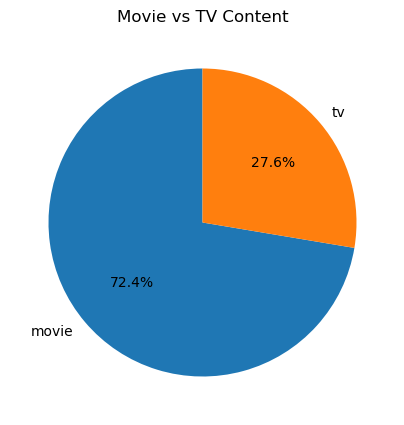

In [62]:
### 1. type (영화/TV 비율)
type_counts = df['type'].value_counts()
plt.figure(figsize=(5,5))
type_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Movie vs TV Content')
plt.ylabel('')
plt.show()

## 개봉연도 분포

In [63]:
### 2. release_date (개봉 연도 분포)
# df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
# plt.figure(figsize=(10,5))
# sns.histplot(df['release_year'].dropna(), bins=20, kde=False)
# plt.title('Distribution of Release Year')
# plt.xlabel('Release Year')
# plt.ylabel('Count')
# plt.show()

## 상영시간 분포

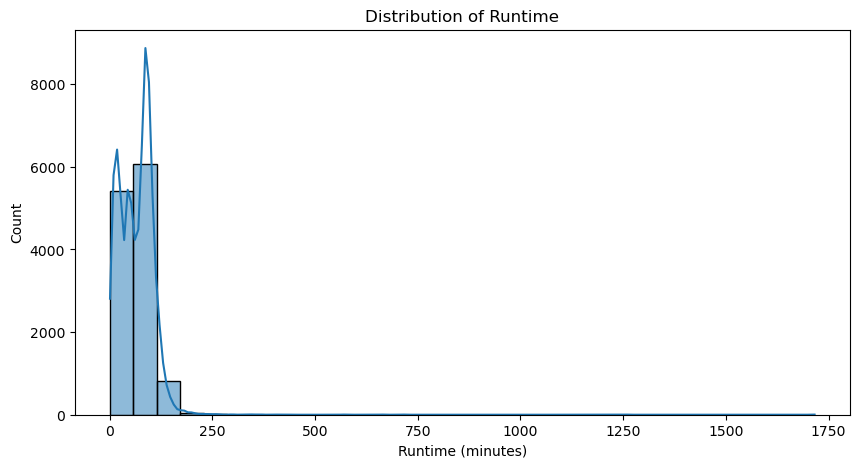

In [64]:
### 3. runtime (상영시간 분포)
plt.figure(figsize=(10,5))
sns.histplot(df['runtime'].dropna(), bins=30, kde=True)
plt.title('Distribution of Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Count')
plt.show()

## 장르분포

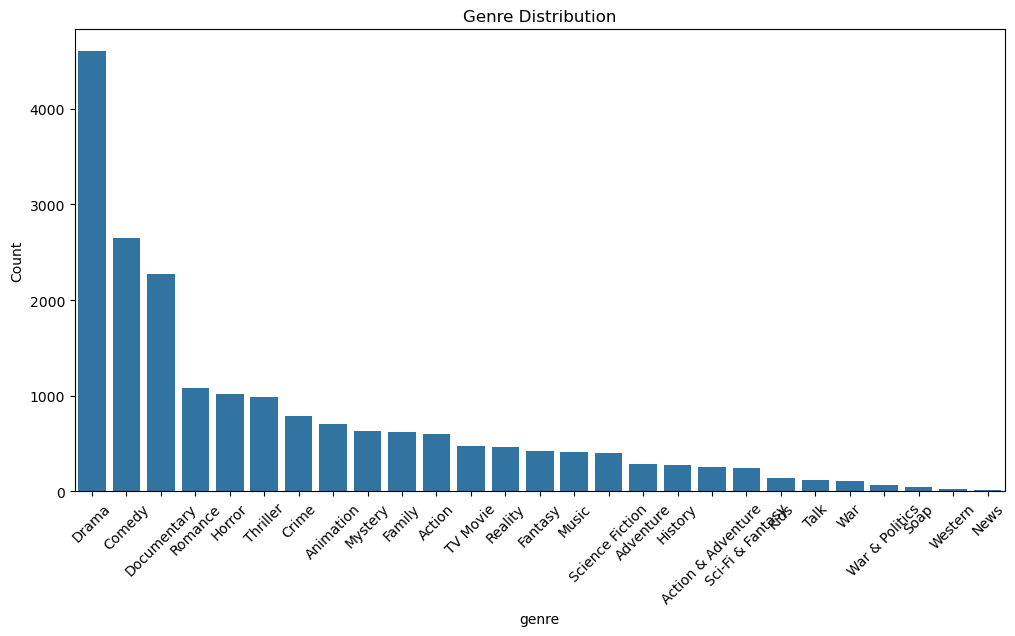

In [65]:
genre_series = df['genre'].dropna().str.split(', ')
genre_list = genre_series.explode()
genre_counts = genre_list.value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Genre Distribution')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## country 분포

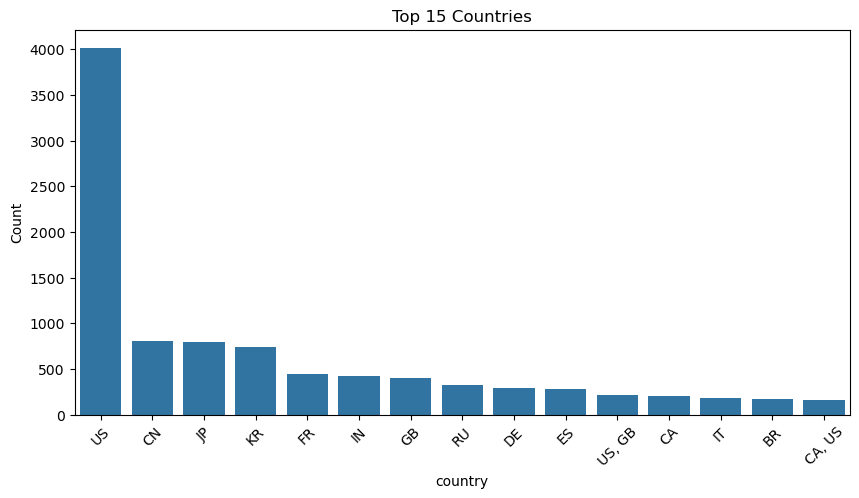

In [66]:
country_counts = df['country'].value_counts().head(15)
plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Top 15 Countries')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## language 분포

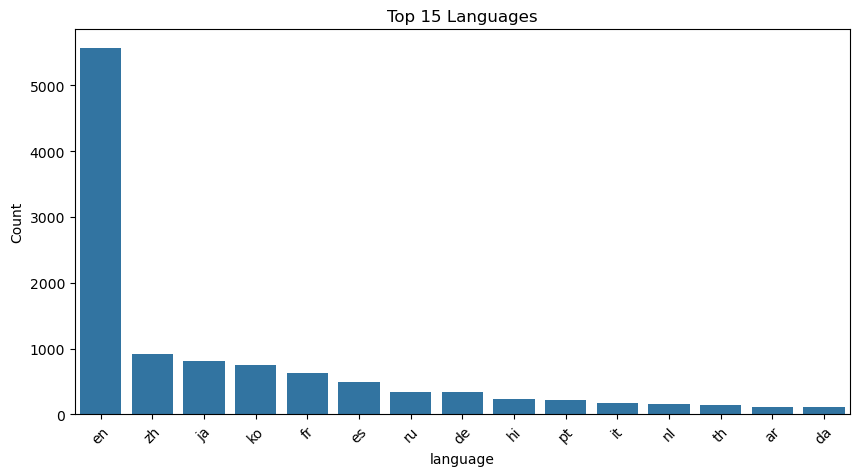

In [67]:
language_counts = df['language'].value_counts().head(15)
plt.figure(figsize=(10,5))
sns.barplot(x=language_counts.index, y=language_counts.values)
plt.title('Top 15 Languages')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## imdb rating 분포

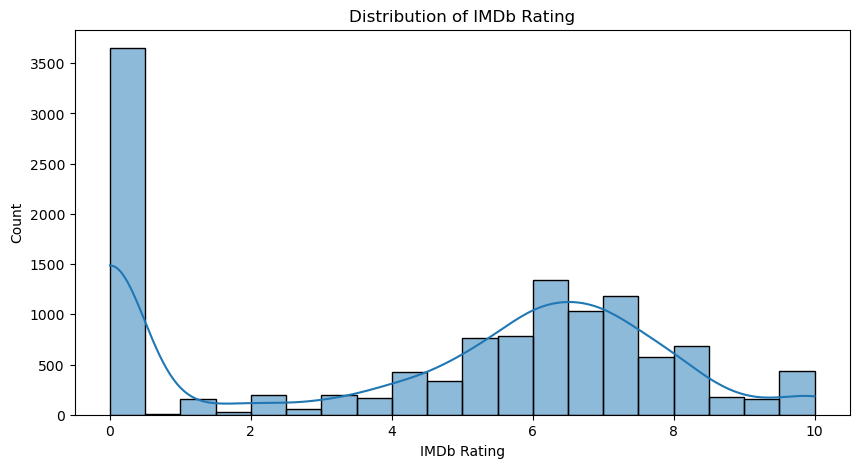

In [68]:
plt.figure(figsize=(10,5))
sns.histplot(df['imdb_rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of IMDb Rating')
plt.xlabel('IMDb Rating')
plt.ylabel('Count')
plt.show()

## imdb_rating vs imdb_review_count

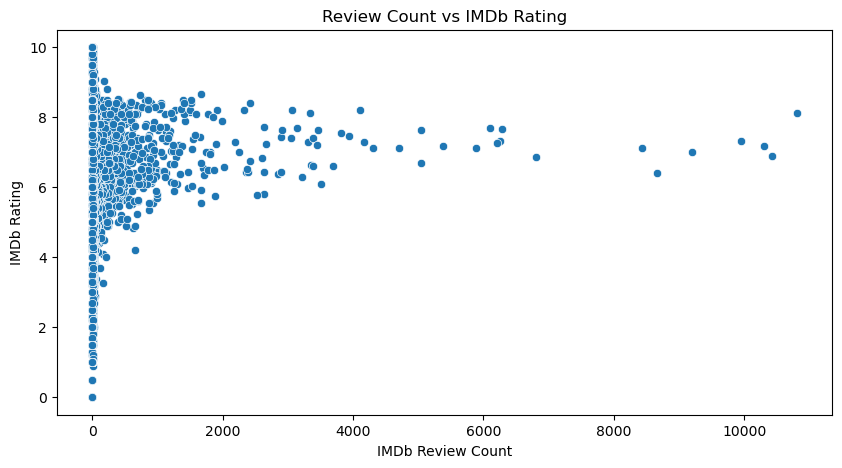

In [69]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='imdb_review_count', y='imdb_rating', data=df)
plt.title('Review Count vs IMDb Rating')
plt.xlabel('IMDb Review Count')
plt.ylabel('IMDb Rating')
plt.show()

## runtime vs imdb_rating

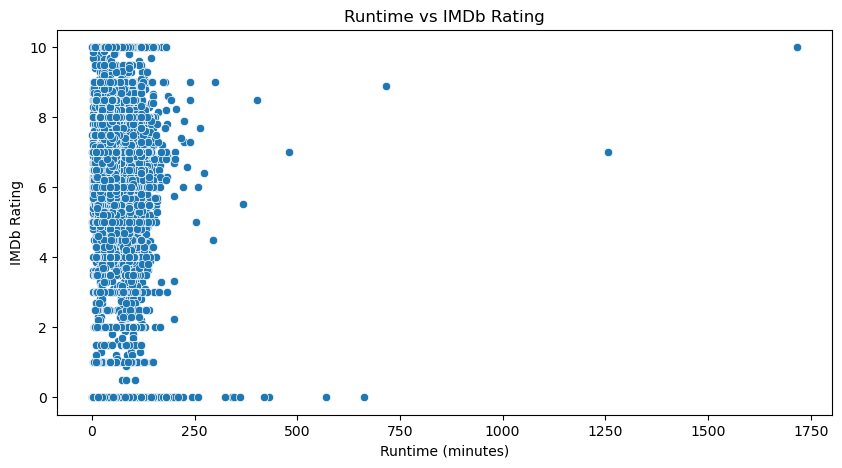

In [70]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='runtime', y='imdb_rating', data=df)
plt.title('Runtime vs IMDb Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Rating')
plt.show()

## 장르별 평점

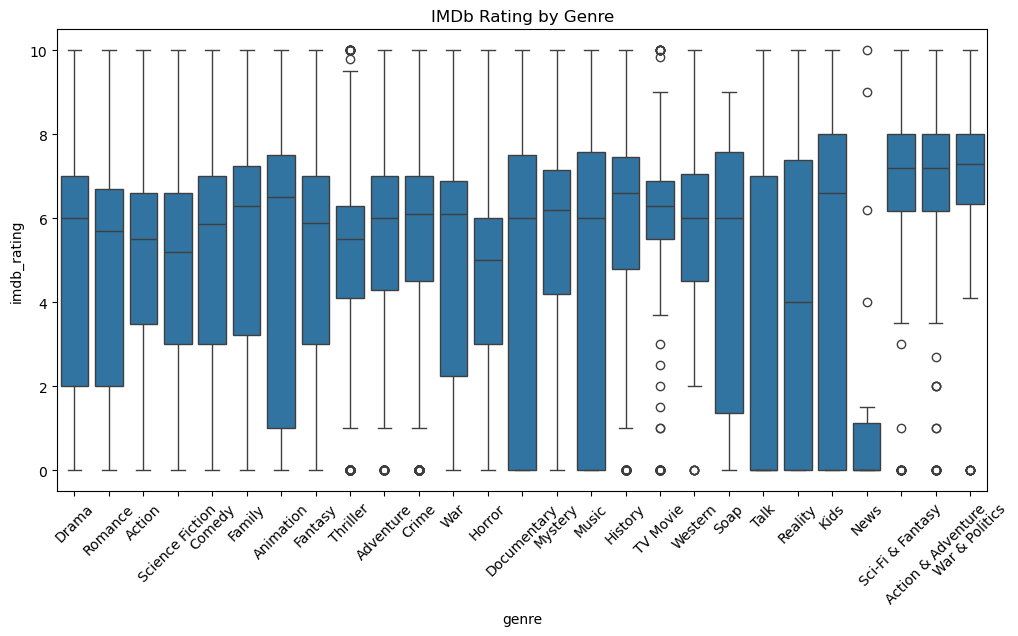

In [71]:
genre_rating = pd.concat([genre_series, df['imdb_rating']], axis=1).explode('genre')
genre_rating = genre_rating.dropna()
plt.figure(figsize=(12,6))
sns.boxplot(x='genre', y='imdb_rating', data=genre_rating)
plt.title('IMDb Rating by Genre')
plt.xticks(rotation=45)
plt.show()

## 나라별 장르 분포도

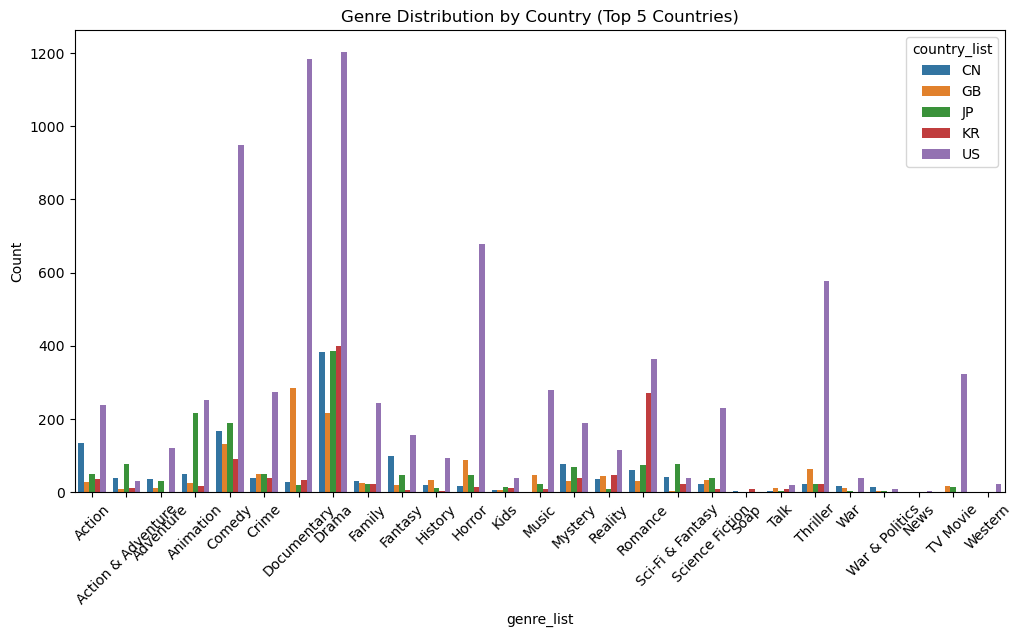

In [73]:
df_country_genre = df.copy()
df_country_genre['country_list'] = df_country_genre['country'].str.split(', ')
df_country_genre = df_country_genre.explode('country_list')
df_country_genre['genre_list'] = df_country_genre['genre'].str.split(', ')
df_country_genre = df_country_genre.explode('genre_list')

country_genre_counts = df_country_genre.groupby(['country_list', 'genre_list']).size().reset_index(name='count')
top_countries = df_country_genre['country_list'].value_counts().head(5).index
filtered = country_genre_counts[country_genre_counts['country_list'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.barplot(x='genre_list', y='count', hue='country_list', data=filtered)
plt.title('Genre Distribution by Country (Top 5 Countries)')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## 평점 신뢰도 분석, 감독별 평균 평점

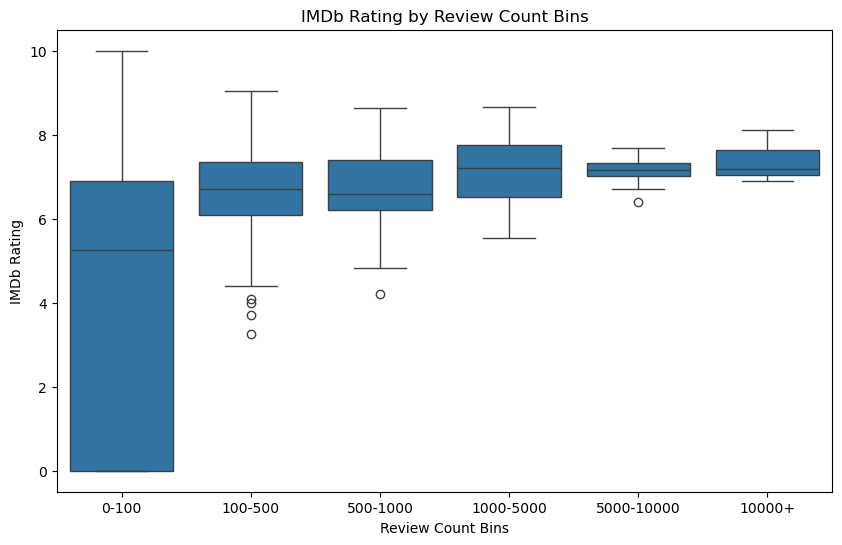

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9105/2791718114.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y='director', data=director_top, palette='viridis')


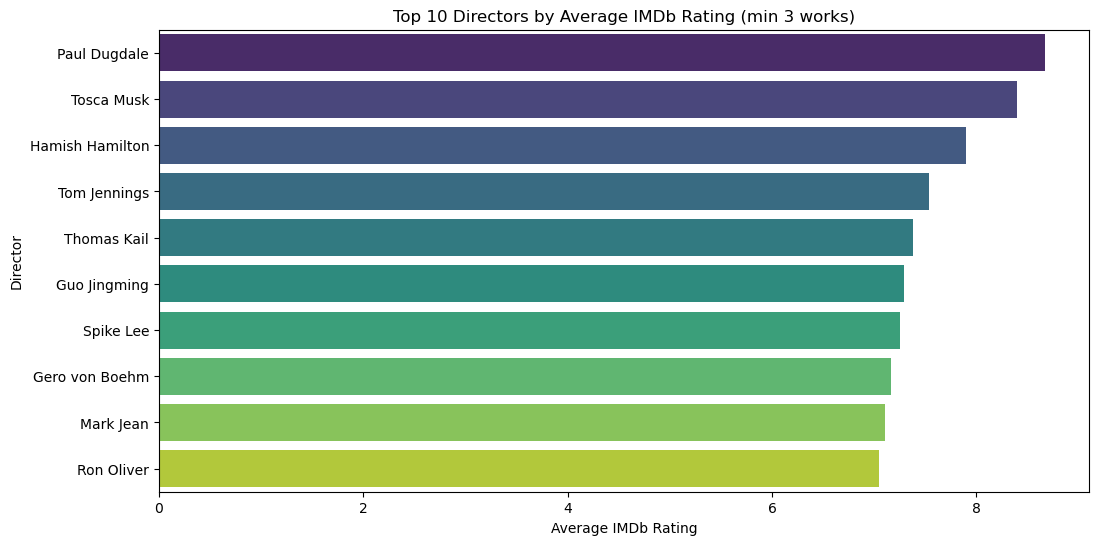

In [74]:
bins = [0, 100, 500, 1000, 5000, 10000, 50000]
labels = ['0-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['review_bin'] = pd.cut(df['imdb_review_count'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10,6))
sns.boxplot(x='review_bin', y='imdb_rating', data=df)
plt.title('IMDb Rating by Review Count Bins')
plt.xlabel('Review Count Bins')
plt.ylabel('IMDb Rating')
plt.show()

### 추가 심화 분석 ③ 감독별 평균 평점
# 감독 집계
director_avg = df.groupby('director')['imdb_rating'].agg(['count', 'mean']).reset_index()
director_top = director_avg[director_avg['count'] >= 3].sort_values(by='mean', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='mean', y='director', data=director_top, palette='viridis')
plt.title('Top 10 Directors by Average IMDb Rating (min 3 works)')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Director')
plt.show()

## 배우별 평균 평점(작품 3개이상인 배우)

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9105/3351837532.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y='cast_list', data=cast_top, palette='plasma')


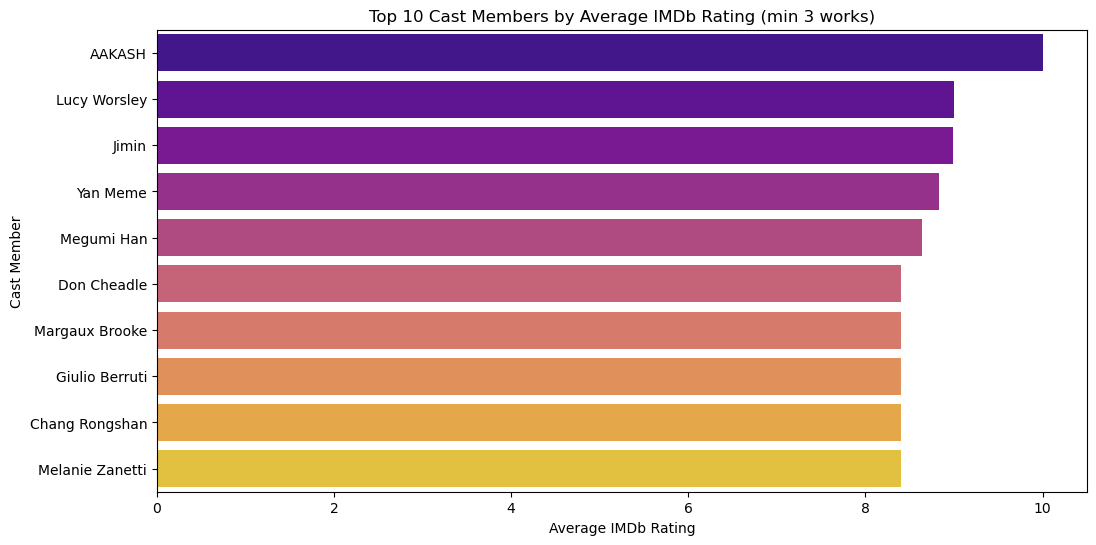

In [76]:
df['cast_list'] = df['cast'].str.split(', ')
df_cast = df.explode('cast_list')

cast_avg = df_cast.groupby('cast_list')['imdb_rating'].agg(['count', 'mean']).reset_index()
cast_top = cast_avg[cast_avg['count'] >= 3].sort_values(by='mean', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='mean', y='cast_list', data=cast_top, palette='plasma')
plt.title('Top 10 Cast Members by Average IMDb Rating (min 3 works)')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Cast Member')
plt.show()

## 개봉 (월) 분석

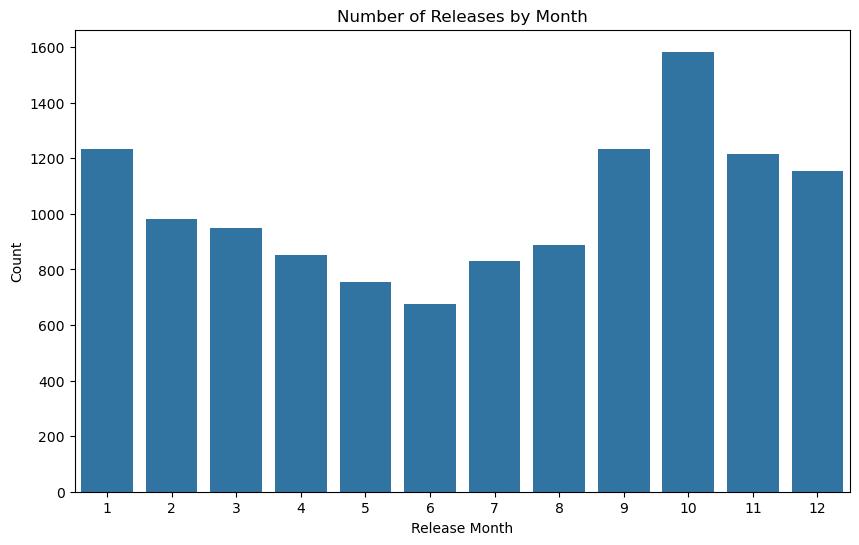

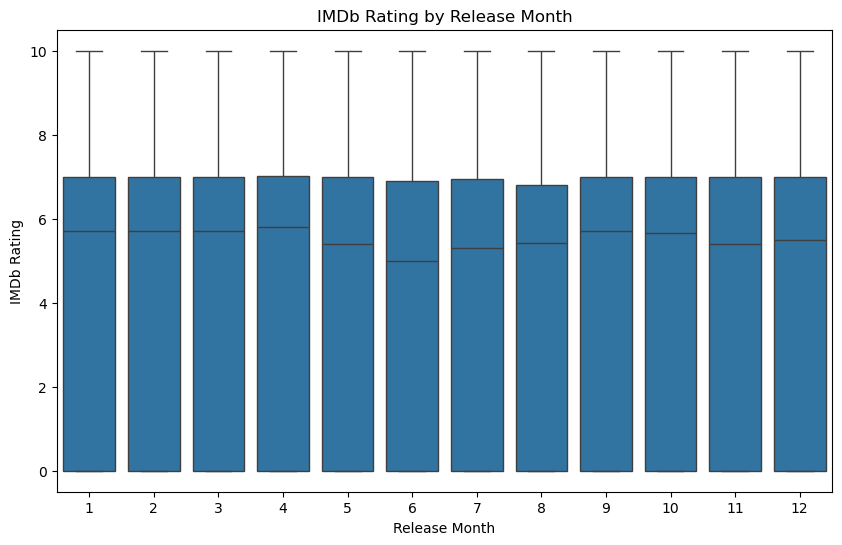

In [77]:
### 추가 심화 분석 ⑤ 개봉 월(month) 분석
df['release_month'] = pd.to_datetime(df['release_date'], errors='coerce').dt.month

plt.figure(figsize=(10,6))
sns.countplot(x='release_month', data=df)
plt.title('Number of Releases by Month')
plt.xlabel('Release Month')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='release_month', y='imdb_rating', data=df)
plt.title('IMDb Rating by Release Month')
plt.xlabel('Release Month')
plt.ylabel('IMDb Rating')
plt.show()